In [1]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data_dr = "./data/"

# Pollution Dataset

#### You can either create this dataset running the notebook ./EnvDigitalTwin/AirQualityDatasetCreation, or download it from the data directory

In [3]:
ds_air = pd.read_csv(data_dr+"/UKAIRAirQuality_digitaltwin_1h.csv", low_memory=False)

#### You can either create this dataset running the notebooks provided in https://github.com/lonanni/InnovationProject_WaterQuality/blob/main/Build_WaterQualityDataset.ipynb or you can find it in teh data directory

In [4]:
ds_water = pd.read_csv(data_dr+"/WaterQuality_PortsmouthPivot.csv", low_memory=False)

In [5]:
ds_water

,Unnamed: 0,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",BOD : 5 Day ATU,Chlorophyll : Acetone Extract,NGR : Easting,...,Salinity : In Situ,Sample Depth below surface,"Silicate, Filtered as SiO2",Temperature of Water,Time of high tide,Time of sampling relative to previous high water,Turbidity : In Situ,Volume of Sample Filtered,Water Depth,pH
0,0,2001-01-17T12:50:00,470680,105280,FINAL SEWAGE EFFLUENT,21.900,NaN,3.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.55
1,1,2001-01-17T13:08:00,471073,106778,RIVER / RUNNING SURFACE WATER,0.043,NaN,1.60,NaN,NaN,...,NaN,NaN,NaN,6.70,NaN,NaN,NaN,NaN,NaN,8.45
2,2,2001-01-17T14:28:00,471507,105709,RIVER / RUNNING SURFACE WATER,0.030,NaN,1.40,NaN,NaN,...,NaN,NaN,NaN,8.10,NaN,NaN,NaN,NaN,NaN,7.90
3,3,2001-01-18T05:34:00,468670,99700,ESTUARINE WATER,0.049,NaN,NaN,NaN,NaN,...,33.30,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,7.95
4,4,2001-01-18T05:46:00,469000,101200,ESTUARINE WATER,0.048,NaN,NaN,NaN,NaN,...,33.30,NaN,NaN,5.04,NaN,NaN,NaN,NaN,NaN,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,3702,2024-10-28T06:50:00,470680,105280,FINAL SEWAGE EFFLUENT,NaN,NaN,3.76,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3703,3703,2024-10-31T14:41:00,471073,106778,RIVER / RUNNING SURFACE WATER,0.030,NaN,3.00,NaN,NaN,...,NaN,NaN,NaN,13.90,NaN,NaN,NaN,NaN,NaN,8.34
3704,3704,2024-11-06T08:32:00,470680,105280,FINAL SEWAGE EFFLUENT,0.500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3705,3705,2024-11-07T10:39:00,468670,99700,ESTUARINE WATER,NaN,0.044,NaN,0.99,468675.0,...,34.19,0.20,0.46,13.60,14.33,8.16,10.5,1100.0,12.07,NaN


In [6]:
ds_water["sample.sampleDateTime"] = pd.to_datetime(ds_water['sample.sampleDateTime'])

In [7]:
ds_water["date"] = pd.to_datetime(ds_water['sample.sampleDateTime']).dt.date
ds_water["time"] = pd.to_datetime(ds_water['sample.sampleDateTime']).dt.time


In [8]:
ds_water = ds_water.drop(columns=["Unnamed: 0"], axis=1)

In [9]:
ds_water

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",BOD : 5 Day ATU,Chlorophyll : Acetone Extract,NGR : Easting,NGR : Northing,...,"Silicate, Filtered as SiO2",Temperature of Water,Time of high tide,Time of sampling relative to previous high water,Turbidity : In Situ,Volume of Sample Filtered,Water Depth,pH,date,time
0,2001-01-17 12:50:00,470680,105280,FINAL SEWAGE EFFLUENT,21.900,NaN,3.70,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.55,2001-01-17,12:50:00
1,2001-01-17 13:08:00,471073,106778,RIVER / RUNNING SURFACE WATER,0.043,NaN,1.60,NaN,NaN,NaN,...,NaN,6.70,NaN,NaN,NaN,NaN,NaN,8.45,2001-01-17,13:08:00
2,2001-01-17 14:28:00,471507,105709,RIVER / RUNNING SURFACE WATER,0.030,NaN,1.40,NaN,NaN,NaN,...,NaN,8.10,NaN,NaN,NaN,NaN,NaN,7.90,2001-01-17,14:28:00
3,2001-01-18 05:34:00,468670,99700,ESTUARINE WATER,0.049,NaN,NaN,NaN,NaN,NaN,...,NaN,5.00,NaN,NaN,NaN,NaN,NaN,7.95,2001-01-18,05:34:00
4,2001-01-18 05:46:00,469000,101200,ESTUARINE WATER,0.048,NaN,NaN,NaN,NaN,NaN,...,NaN,5.04,NaN,NaN,NaN,NaN,NaN,7.90,2001-01-18,05:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,2024-10-28 06:50:00,470680,105280,FINAL SEWAGE EFFLUENT,NaN,NaN,3.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-28,06:50:00
3703,2024-10-31 14:41:00,471073,106778,RIVER / RUNNING SURFACE WATER,0.030,NaN,3.00,NaN,NaN,NaN,...,NaN,13.90,NaN,NaN,NaN,NaN,NaN,8.34,2024-10-31,14:41:00
3704,2024-11-06 08:32:00,470680,105280,FINAL SEWAGE EFFLUENT,0.500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-06,08:32:00
3705,2024-11-07 10:39:00,468670,99700,ESTUARINE WATER,NaN,0.044,NaN,0.99,468675.0,99656.0,...,0.46,13.60,14.33,8.16,10.5,1100.0,12.07,NaN,2024-11-07,10:39:00


In [10]:
ds_water = ds_water.set_index(['sample.sampleDateTime'])


In [11]:
ds_water

,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",BOD : 5 Day ATU,Chlorophyll : Acetone Extract,NGR : Easting,NGR : Northing,Nitrate as N,...,"Silicate, Filtered as SiO2",Temperature of Water,Time of high tide,Time of sampling relative to previous high water,Turbidity : In Situ,Volume of Sample Filtered,Water Depth,pH,date,time
sample.sampleDateTime,,,,,,,,,,,,,,,,,,,,,
2001-01-17 12:50:00,470680,105280,FINAL SEWAGE EFFLUENT,21.900,NaN,3.70,NaN,NaN,NaN,2.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.55,2001-01-17,12:50:00
2001-01-17 13:08:00,471073,106778,RIVER / RUNNING SURFACE WATER,0.043,NaN,1.60,NaN,NaN,NaN,8.730,...,NaN,6.70,NaN,NaN,NaN,NaN,NaN,8.45,2001-01-17,13:08:00
2001-01-17 14:28:00,471507,105709,RIVER / RUNNING SURFACE WATER,0.030,NaN,1.40,NaN,NaN,NaN,8.740,...,NaN,8.10,NaN,NaN,NaN,NaN,NaN,7.90,2001-01-17,14:28:00
2001-01-18 05:34:00,468670,99700,ESTUARINE WATER,0.049,NaN,NaN,NaN,NaN,NaN,0.554,...,NaN,5.00,NaN,NaN,NaN,NaN,NaN,7.95,2001-01-18,05:34:00
2001-01-18 05:46:00,469000,101200,ESTUARINE WATER,0.048,NaN,NaN,NaN,NaN,NaN,0.615,...,NaN,5.04,NaN,NaN,NaN,NaN,NaN,7.90,2001-01-18,05:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28 06:50:00,470680,105280,FINAL SEWAGE EFFLUENT,NaN,NaN,3.76,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-28,06:50:00
2024-10-31 14:41:00,471073,106778,RIVER / RUNNING SURFACE WATER,0.030,NaN,3.00,NaN,NaN,NaN,1.870,...,NaN,13.90,NaN,NaN,NaN,NaN,NaN,8.34,2024-10-31,14:41:00
2024-11-06 08:32:00,470680,105280,FINAL SEWAGE EFFLUENT,0.500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-06,08:32:00


In [12]:
ds_water_ = ds_water.copy()

In [13]:
ds_water_["time_group"] = ds_water_.index.floor("1H")

In [14]:
ds_water_1h = ds_water_.groupby(["time_group", "sample.samplingPoint.easting", "sample.samplingPoint.northing"]).mean()

In [15]:
ds_water_1h = ds_water_1h.reset_index()

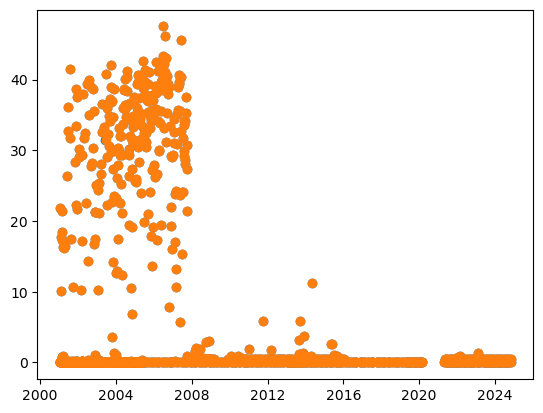

In [16]:
plt.scatter(ds_water_1h["time_group"], ds_water_1h["Ammoniacal Nitrogen as N"])
plt.scatter(ds_water.index, ds_water["Ammoniacal Nitrogen as N"])

plt.show()

We now want to merge te two dataset

In [17]:
ds_water_1h

,time_group,sample.samplingPoint.easting,sample.samplingPoint.northing,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",BOD : 5 Day ATU,Chlorophyll : Acetone Extract,NGR : Easting,NGR : Northing,Nitrate as N,...,Salinity : In Situ,Sample Depth below surface,"Silicate, Filtered as SiO2",Temperature of Water,Time of high tide,Time of sampling relative to previous high water,Turbidity : In Situ,Volume of Sample Filtered,Water Depth,pH
0,2001-01-17 12:00:00,470680,105280,21.900,NaN,3.70,NaN,NaN,NaN,2.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.55
1,2001-01-17 13:00:00,471073,106778,0.043,NaN,1.60,NaN,NaN,NaN,8.730,...,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN,8.45
2,2001-01-17 14:00:00,471507,105709,0.030,NaN,1.40,NaN,NaN,NaN,8.740,...,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,7.90
3,2001-01-18 05:00:00,468380,101980,0.049,NaN,NaN,NaN,NaN,NaN,0.714,...,33.30,NaN,NaN,5.1,NaN,NaN,NaN,NaN,NaN,7.95
4,2001-01-18 05:00:00,468670,99700,0.049,NaN,NaN,NaN,NaN,NaN,0.554,...,33.30,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,7.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,2024-10-28 06:00:00,470680,105280,NaN,NaN,3.76,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3603,2024-10-31 14:00:00,471073,106778,0.030,NaN,3.00,NaN,NaN,NaN,1.870,...,NaN,NaN,NaN,13.9,NaN,NaN,NaN,NaN,NaN,8.34
3604,2024-11-06 08:00:00,470680,105280,0.500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3605,2024-11-07 10:00:00,468670,99700,NaN,0.044,NaN,0.99,468675.0,99656.0,NaN,...,34.19,0.20,0.46,13.6,14.33,8.16,10.5,1100.0,12.07,NaN


In [18]:
ds_air

,Unnamed: 0,Date,time,PM10 particulate matter (Hourly measured),status,unit,Nitric oxide,status.1,unit.1,Nitrogen dioxide,...,unit.8,Volatile PM2.5 (Hourly measured),status.9,unit.9,PM<sub>10</sub> particulate matter (Hourly measured),Non-volatile PM<sub>10</sub> (Hourly measured),Non-volatile PM<sub>2.5</sub> (Hourly measured),PM<sub>2.5</sub> particulate matter (Hourly measured),Volatile PM<sub>10</sub> (Hourly measured),Volatile PM<sub>2.5</sub> (Hourly measured)
0,0,01-01-2001,01:00,31.0,R,ugm-3 (GRAV EQ),1.0,R,ugm-3,6.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,01-01-2001,02:00,25.0,R,ugm-3 (GRAV EQ),0.0,R,ugm-3,8.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,01-01-2001,03:00,25.0,R,ugm-3 (GRAV EQ),0.0,R,ugm-3,6.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,01-01-2001,04:00,22.0,R,ugm-3 (GRAV EQ),0.0,R,ugm-3,6.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,01-01-2001,05:00,29.0,R,ugm-3 (GRAV EQ),0.0,R,ugm-3,6.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209731,209731,04-12-2024,20:00,NaN,P,ugm-3 (FIDAS),0.0,P,ugm-3,7.07625,...,NaN,NaN,NaN,NaN,10.8,NaN,NaN,5.189,NaN,NaN
209732,209732,04-12-2024,21:00,NaN,P,ugm-3 (FIDAS),0.0,P,ugm-3,8.41500,...,NaN,NaN,NaN,NaN,11.1,NaN,NaN,5.566,NaN,NaN
209733,209733,04-12-2024,22:00,NaN,P,ugm-3 (FIDAS),0.0,P,ugm-3,7.26750,...,NaN,NaN,NaN,NaN,13.1,NaN,NaN,7.076,NaN,NaN
209734,209734,04-12-2024,23:00,NaN,P,ugm-3 (FIDAS),0.0,P,ugm-3,6.88500,...,NaN,NaN,NaN,NaN,11.6,NaN,NaN,7.076,NaN,NaN


In [19]:
ds_air['time'][ds_air['time']=="24:00"]="00:00"

ds_air['date'] = pd.to_datetime(ds_air['Date'] + ' ' + ds_air['time'])


<ipython-input-19-98a3bfdbfc36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_air['time'][ds_air['time']=="24:00"]="00:00"


In [20]:
ds_water_1h = ds_water_1h.rename(columns={"time_group":"date"})

In [21]:
df_poll = pd.merge(ds_water_1h, ds_air, on="date", how="outer")

In [22]:
df_poll = df_poll.sort_values("date").reset_index(drop=True)

In [23]:
df_poll

,date,sample.samplingPoint.easting,sample.samplingPoint.northing,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",BOD : 5 Day ATU,Chlorophyll : Acetone Extract,NGR : Easting,NGR : Northing,Nitrate as N,...,unit.8,Volatile PM2.5 (Hourly measured),status.9,unit.9,PM<sub>10</sub> particulate matter (Hourly measured),Non-volatile PM<sub>10</sub> (Hourly measured),Non-volatile PM<sub>2.5</sub> (Hourly measured),PM<sub>2.5</sub> particulate matter (Hourly measured),Volatile PM<sub>10</sub> (Hourly measured),Volatile PM<sub>2.5</sub> (Hourly measured)
0,2001-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211042,2024-12-11 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,NaN,NaN,6.887,NaN,NaN
211043,2024-12-11 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.3,NaN,NaN,6.038,NaN,NaN
211044,2024-12-11 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,6.226,NaN,NaN
211045,2024-12-11 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,7.359,NaN,NaN


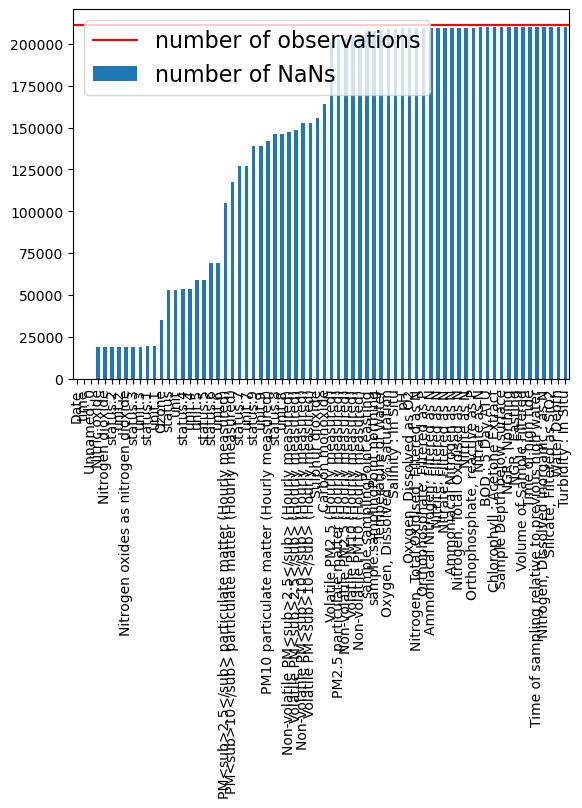

In [24]:
missing = df_poll.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
f, ax = plt.subplots()


missing.plot.bar(label="number of NaNs");
plt.axhline(y=df_poll.shape[0], color="red", label="number of observations")
plt.legend(fontsize=16)
plt.show()

In [25]:
set(df_poll.columns)

{'Ammoniacal Nitrogen as N',
 'Ammoniacal Nitrogen, Filtered as N',
 'BOD : 5 Day ATU',
 'Carbon monoxide',
 'Chlorophyll : Acetone Extract',
 'Date',
 'NGR : Easting',
 'NGR : Northing',
 'Nitrate as N',
 'Nitrate, Filtered as N',
 'Nitric oxide',
 'Nitrite as N',
 'Nitrite, Filtered as N',
 'Nitrogen dioxide',
 'Nitrogen oxides as nitrogen dioxide',
 'Nitrogen, Dissolved Inorganic : as N',
 'Nitrogen, Total Oxidised as N',
 'Nitrogen, Total Oxidised, Filtered as N',
 'Non-volatile PM10 (Hourly measured)',
 'Non-volatile PM2.5 (Hourly measured)',
 'Non-volatile PM<sub>10</sub> (Hourly measured)',
 'Non-volatile PM<sub>2.5</sub> (Hourly measured)',
 'Orthophosphate, Filtered as P',
 'Orthophosphate, reactive as P',
 'Oxygen, Dissolved as O2',
 'Oxygen, Dissolved, % Saturation',
 'Ozone',
 'PM10 particulate matter (Hourly measured)',
 'PM2.5 particulate matter (Hourly measured)',
 'PM<sub>10</sub> particulate matter (Hourly measured)',
 'PM<sub>2.5</sub> particulate matter (Hourly measu

In [26]:
serch_for = ["status", "unit"]


columns_to_keep = df_poll.columns[df_poll.columns.str.contains('|'.join(serch_for), case=True)==False]

In [27]:
df_poll = df_poll[columns_to_keep]

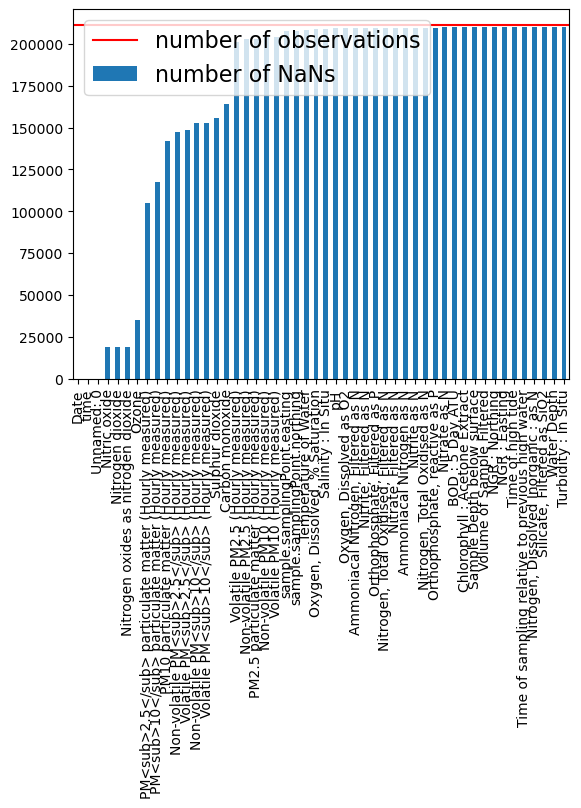

In [28]:
missing = df_poll.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
f, ax = plt.subplots()


missing.plot.bar(label="number of NaNs");
plt.axhline(y=df_poll.shape[0], color="red", label="number of observations")
plt.legend(fontsize=16)
plt.show()

In [29]:
df_poll = df_poll.drop(["time", "Date"], axis=1)

In [30]:
set(df_poll.columns)

{'Ammoniacal Nitrogen as N',
 'Ammoniacal Nitrogen, Filtered as N',
 'BOD : 5 Day ATU',
 'Carbon monoxide',
 'Chlorophyll : Acetone Extract',
 'NGR : Easting',
 'NGR : Northing',
 'Nitrate as N',
 'Nitrate, Filtered as N',
 'Nitric oxide',
 'Nitrite as N',
 'Nitrite, Filtered as N',
 'Nitrogen dioxide',
 'Nitrogen oxides as nitrogen dioxide',
 'Nitrogen, Dissolved Inorganic : as N',
 'Nitrogen, Total Oxidised as N',
 'Nitrogen, Total Oxidised, Filtered as N',
 'Non-volatile PM10 (Hourly measured)',
 'Non-volatile PM2.5 (Hourly measured)',
 'Non-volatile PM<sub>10</sub> (Hourly measured)',
 'Non-volatile PM<sub>2.5</sub> (Hourly measured)',
 'Orthophosphate, Filtered as P',
 'Orthophosphate, reactive as P',
 'Oxygen, Dissolved as O2',
 'Oxygen, Dissolved, % Saturation',
 'Ozone',
 'PM10 particulate matter (Hourly measured)',
 'PM2.5 particulate matter (Hourly measured)',
 'PM<sub>10</sub> particulate matter (Hourly measured)',
 'PM<sub>2.5</sub> particulate matter (Hourly measured)',
 '

In [31]:
chemicals = ['Ammoniacal Nitrogen as N',
 'Carbon monoxide',
 'Chlorophyll : Acetone Extract',
 'Nitrate as N',
 'Nitric oxide',
 'Nitrite as N',
 'Nitrogen dioxide',
 'Nitrogen oxides as nitrogen dioxide',
 'Non-volatile PM10 (Hourly measured)',
 'Non-volatile PM2.5 (Hourly measured)',
 'Orthophosphate, Filtered as P',
 'Oxygen, Dissolved as O2',
 'Oxygen, Dissolved, % Saturation',
 'Ozone',
 'PM10 particulate matter (Hourly measured)',
 'PM2.5 particulate matter (Hourly measured)',
 'Salinity : In Situ',
 'Silicate, Filtered as SiO2',
 'Sulphur dioxide',
 'Temperature of Water',
 'Volatile PM10 (Hourly measured)',
 'Volatile PM2.5 (Hourly measured)',
 'pH',
]

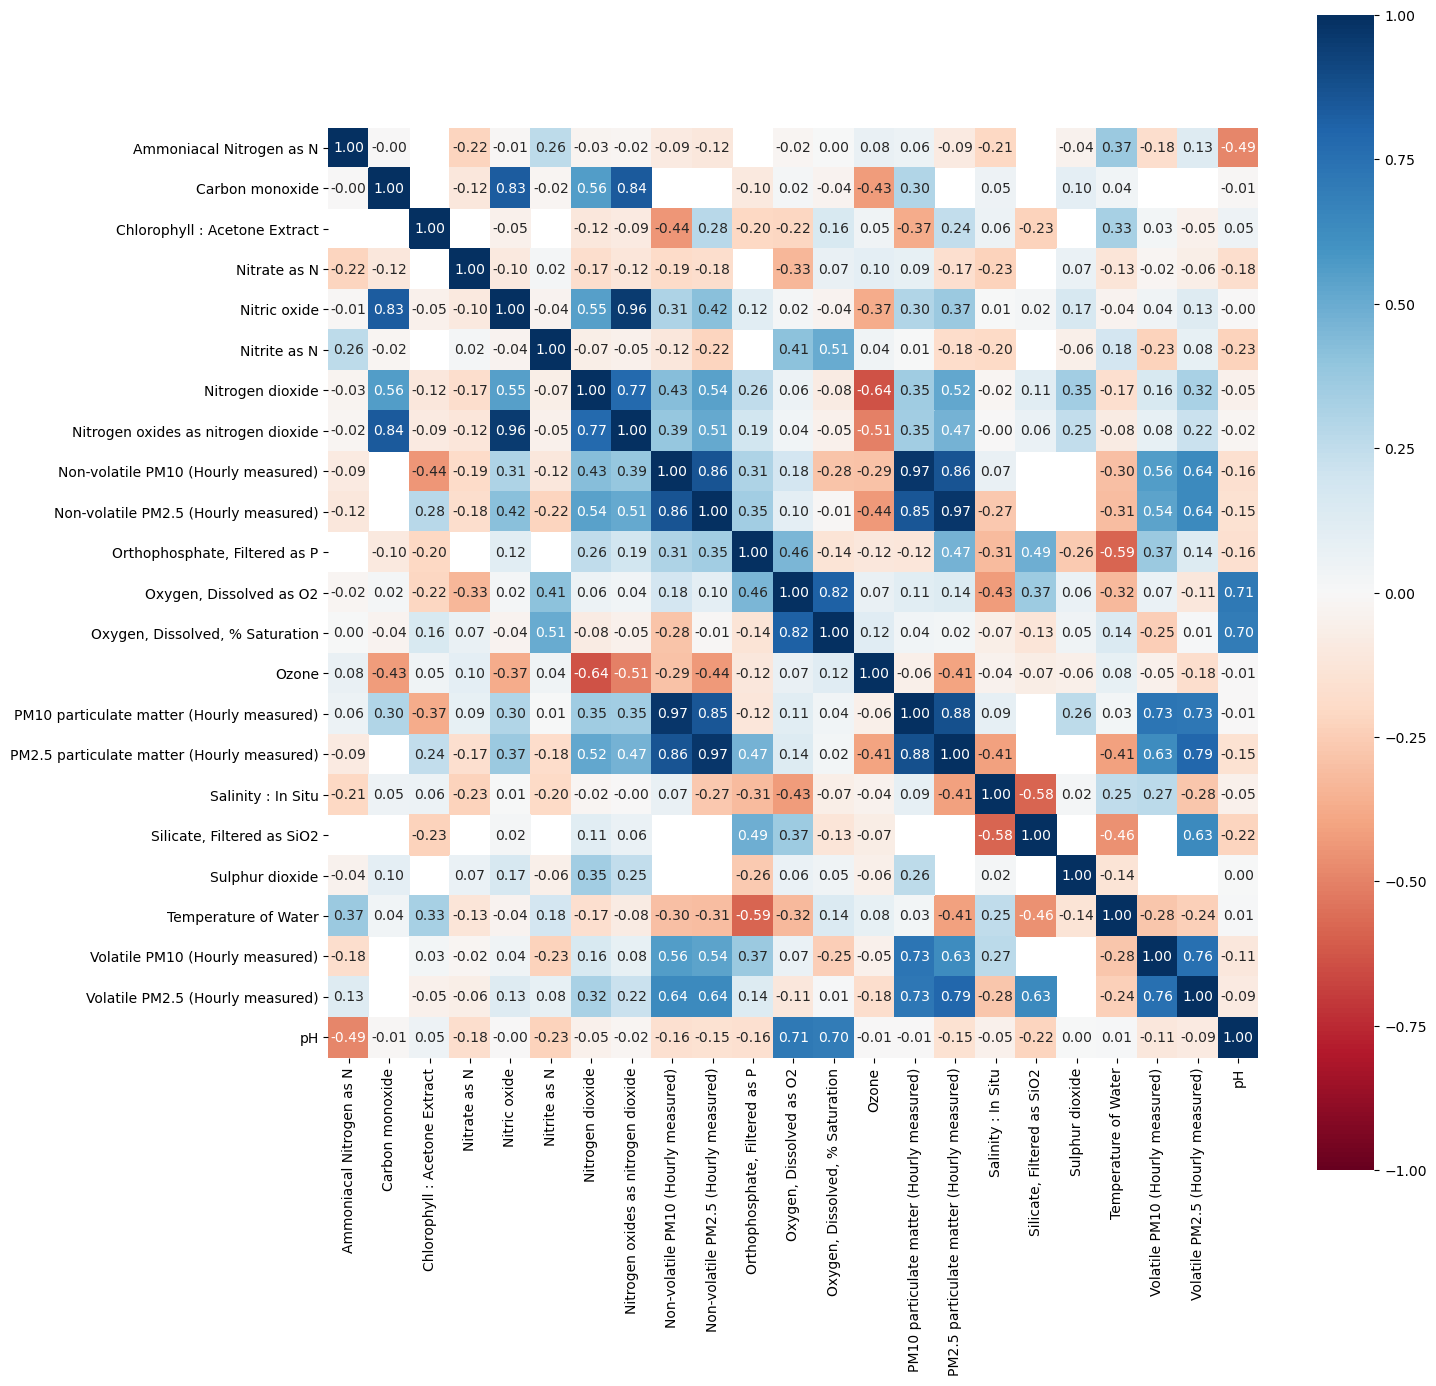

In [32]:
corrmat = df_poll[chemicals].astype(float).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1, fmt=".2f");

plt.show()

In [33]:
df_poll.to_csv(data_dr+"Pollution_1h.csv")